<a href="https://colab.research.google.com/github/Farazmghm/Business-Machine-Learning-and-EDA/blob/main/IT_employees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset Overview
The dataset includes the following columns:

ID: A unique identifier for each employee (ranging from 1 to 400).
Gender: The gender of the employee, with values being either 'M' (Male) or 'F' (Female).
Experience (Years): The number of years of professional experience the employee has, ranging from 0 to 20 years.
Position: The job title of the employee, with the following roles represented:
@ IT Manager
@ Software Engineer
Network Administrator
Systems Administrator
Database Administrator (DBA)
Web Developer
IT Support Specialist
Systems Analyst
IT Security Analyst
DevOps Engineer
Cloud Solutions Architect
Salary: The annual salary of the employee in USD, reflecting realistic compensation trends within the IT industry. Salaries increase with both the job position and years of experience.
Data Generation
The dataset was created using the Faker library in Python, which allows for the generation of realistic, fake data for various applications. This ensures that the data mimics real-world distributions and variations within the IT industry.

Usage
This dataset can be used for various purposes, including:

Statistical Analysis: Investigate the distribution of salaries, years of experience, and gender representation across different positions.
Machine Learning: Train models to predict salaries based on experience, position, and other factors.
Educational Purposes: Use the dataset to teach data analysis, data visualization, and machine learning techniques.

In [35]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [48]:
df=pd.read_csv('/content/drive/MyDrive/employee_data.csv',index_col=0)
df

,Gender,Experience (Years),Position,Salary
ID,,,,
1,F,4,DevOps Engineer,109976
2,M,6,DevOps Engineer,120088
3,M,17,Web Developer,181301
4,M,7,Systems Administrator,77530
5,F,13,Systems Administrator,152397
...,...,...,...,...
396,F,19,Cloud Solutions Architect,236045
397,F,20,Web Developer,182770
398,F,9,Network Administrator,85550


###Exploration


In [23]:
df.columns
df.info()
df.nunique()
df.describe(include=[np.number])
df.describe(exclude=[np.number])
df.value_counts().to_frame()
df.isnull().sum()
df.duplicated().sum()
df.shape
df.dtypes

,0
Gender,object
Experience (Years),int64
Position,object
Salary,int64


In [49]:
df['Gender']=df['Gender'].astype('category')
df['Position']=df['Position'].astype('category')
df_cat=df.select_dtypes(include='category')
df_num=df.select_dtypes(exclude='category')

In [55]:
def find_outliers(column):
  Q1=column.quantile(0.25)
  Q3=column.quantile(0.75)
  IQR=Q3-Q1
  Lower_bound=Q1-1.5*IQR
  Upper_bound=Q3+1.5*IQR
  return column[(column<Lower_bound) | (column>Upper_bound)]

for i , column in enumerate(df_num.columns):
  outleirs=find_outliers(df_num[column])
  if (outleirs.size>0):
    print(f"Outleires in {column}:/n {outleirs}")

Outleires in Salary:/n ID
62     260594
116    269950
121    268774
162    244446
260    252949
Name: Salary, dtype: int64


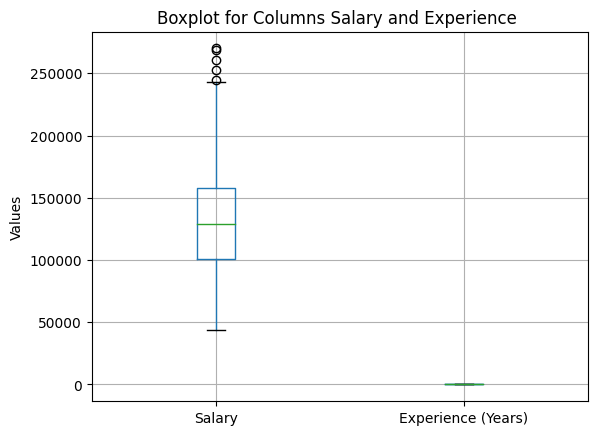

In [54]:
df.boxplot(column=['Salary','Experience (Years)'])
plt.title('Boxplot for Columns Salary and Experience ')
plt.ylabel('Values')
plt.show()

In [64]:
from scipy.stats import skew,kurtosis
skew=skew(df['Salary'])
kurtosis=kurtosis(df['Salary'])
print(f"Skewness:{skew}")
print(f"kurtosis:{kurtosis}")

Skewness:0.5462740636875458
kurtosis:0.09270807500098632
